<a href="https://colab.research.google.com/github/Naomi0601/Simulacion/blob/main/Proyecto_SIMULACION2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Una peluqueria quiere ver que le conviene mas si contratar a 2 o 3 con un tiempo de atencion entre 15 y 30 minutos en un total de 5 horas (300 minutos)**

# **DISEÑO DE EXPERIMENTO DE 3 PELUQUEROS**

In [ ]:
!pip install simpy

In [ ]:
import simpy #simulación basada en eventos discretos
import random #generar números aleatorios
from tabulate import tabulate #mostrar los resultados en una tabla.
import matplotlib.pyplot as plt #para crear gráficos
import numpy as np #realizar cálculos numéricos.

In [ ]:
def cliente(env, servidor, num_cliente):
    llegada = env.now + random.uniform(0, 10) #generamos el tiempo de llegada con una distribucion uniforme

    with servidor.request() as req: #sirve para segurarnos se libere correctamente
        yield req                   #cuando cliente haya terminado su atencion

        peluquero = None # indica que inicialmente no se ha asignado ningún valor específico a esa variable.
        for i, p in enumerate(peluqueros_disponibles): #buscar un peluquero disponible
            if p == True: #peluquero esta libre
                peluquero = i + 1  #peluquero el valor de i incrementado en 1.
                peluqueros_disponibles[i] = False #peluquero esta ocupado
                break

        yield env.timeout(max(0, llegada - env.now))  # Esperar hasta la hora de llegada
        hora_atencion = env.now #se guarda el valor del tiempo actual en la simulación en la variable hora_atencion
        atencion = random.uniform(15, 30) #tiempo de atencion va de 15 a 30
        yield env.timeout(atencion) #pausa la ejecución del generador actual durante un período de tiempo especificado por la variable atencion

        partida = env.now
        espera = max(0, hora_atencion - llegada) #Registramos la hora de salida del cliente, calculamos el tiempo de espera

        # Guardar los datos del cliente en una lista
        datos_cliente = [num_cliente, peluquero, llegada, hora_atencion, partida, espera, partida - llegada]
        resultados.append(datos_cliente)

        # Marcar al peluquero como disponible nuevamente
        peluqueros_disponibles[peluquero - 1] = True

In [ ]:
def llegada_clientes(env):
    contador = 1
    while True:
        yield env.timeout(random.expovariate(1 / 10))  #genera un número aleatorio siguiendo una distribución exponencial con un parámetro de tasa de 1/10
        cola_clientes.append(contador) #agrega el valor de la variable contador al final de la lista cola_clientes
        env.process(cliente(env, servidor, contador)) #crea un nuevo proceso dentro del entorno de simulación env utilizando la función o generador cliente
        contador += 1

In [ ]:
env = simpy.Environment()
servidor = simpy.Resource(env, capacity=3)  # Tres peluqueros disponibles
resultados = []  # Lista para almacenar los datos de los clientes
peluqueros_disponibles = [True] * 3  # Lista para rastrear la disponibilidad de los peluqueros
cola_clientes = []  # Cola para almacenar eventos de llegada de clientes

In [ ]:
env.process(llegada_clientes(env)) #Creamos un proceso para la función
env.run(until=300)  # Simular durante 300 minutos

In [ ]:
# Calcular el promedio del tiempo en fila y el tiempo en el sistema
promedio_fila3=[]
tiempo_en_fila = [cliente[5] for cliente in resultados]
promedio_fila3 = sum(tiempo_en_fila) / len(tiempo_en_fila)
promedio_sistema3=[]
tiempo_en_sistema = [cliente[6] for cliente in resultados]
promedio_sistema3 = sum(tiempo_en_sistema) / len(tiempo_en_sistema)

In [ ]:
# Imprimir la tabla de resultados
columnas3 = ['Cliente', 'Peluquero', 'Hora de llegada', 'Hora de atención', 'Hora de salida', 'Tiempo de espera', 'Tiempo en el sistema']
print(tabulate(resultados, headers=columnas3, tablefmt='orgtbl'))

# Imprimir el promedio del tiempo en fila y el tiempo en el sistema
print(f"\nPromedio de tiempo en fila: {promedio_fila3:.2f}")
print(f"Promedio de tiempo en el sistema: {promedio_sistema3:.2f}")

|   Cliente |   Peluquero |   Hora de llegada |   Hora de atención |   Hora de salida |   Tiempo de espera |   Tiempo en el sistema |
|-----------+-------------+-------------------+--------------------+------------------+--------------------+------------------------|
|         2 |           2 |           5.29067 |            5.29067 |          29.3167 |            0       |                24.0261 |
|         3 |           3 |          10.5976  |           10.5976  |          29.4885 |            0       |                18.8909 |
|         1 |           1 |           5.50277 |            5.50277 |          32.2978 |            0       |                26.795  |
|         4 |           2 |          15.5137  |           29.3167  |          46.6098 |           13.803   |                31.096  |
|         6 |           1 |          27.2517  |           32.2978  |          54.9466 |            5.04611 |                27.6949 |
|         5 |           3 |          17.6994  |           29.4

# **OSCIO**

El tiempo de ociosidad se calcula sumando el tiempo que un peluquero ha estado sin atender a ningún cliente. Esto ocurre cuando el peluquero está libre y no hay clientes esperando para ser atendidos.

El cálculo del tiempo de ociosidad de cada peluquero es útil para evaluar la eficiencia del sistema. Un tiempo de ociosidad alto puede indicar que hay peluqueros disponibles que podrían estar atendiendo a más clientes, lo que implica una menor utilización de los recursos disponibles en la peluquería.


In [ ]:
def calcular_tiempo_no_trabajado(resultados, peluqueros_disponibles):
    tiempo_no_trabajado_peluqueros3 = [0] * len(peluqueros_disponibles)
    clientes_atendidos_peluquero = [[] for _ in range(len(peluqueros_disponibles))]

    for cliente in resultados:
        peluquero = cliente[1]
        clientes_atendidos_peluquero[peluquero - 1].append(cliente)

    suma_tiempo_no_trabajado3 = 0

    for i, clientes_peluquero in enumerate(clientes_atendidos_peluquero):
        tiempo_no_trabajado = 0
        hora_salida_anterior = 0

        for cliente in clientes_peluquero:
            hora_salida = cliente[4]
            tiempo_no_trabajado += cliente[3] - hora_salida_anterior
            hora_salida_anterior = hora_salida

        tiempo_no_trabajado_peluqueros3[i] = tiempo_no_trabajado
        suma_tiempo_no_trabajado3 += tiempo_no_trabajado

    return tiempo_no_trabajado_peluqueros3, suma_tiempo_no_trabajado3

tiempo_no_trabajado_peluqueros3, suma_tiempo_no_trabajado3 = calcular_tiempo_no_trabajado(resultados, peluqueros_disponibles)
porcentajes_tiempo_no_trabajado3 = []
for i, tiempo in enumerate(tiempo_no_trabajado_peluqueros3):
    peluquero = i + 1
    porcentajes_tiempo_no_trabajado = (tiempo * 100) / 300
    print(f"Tiempo no trabajado del Peluquero {peluquero}: {tiempo:.2f} minutos ({porcentajes_tiempo_no_trabajado:.2f}%)")
    porcentajes_tiempo_no_trabajado3.append(porcentajes_tiempo_no_trabajado)


Tiempo no trabajado del Peluquero 1: 77.57 minutos (25.86%)
Tiempo no trabajado del Peluquero 2: 99.39 minutos (33.13%)
Tiempo no trabajado del Peluquero 3: 131.69 minutos (43.90%)


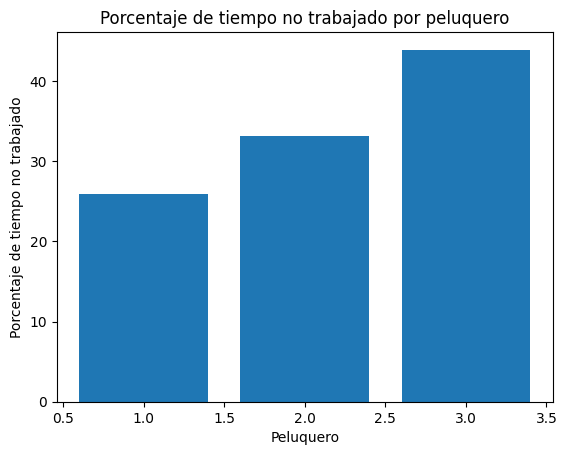

In [ ]:
# Crear una lista con los números de los peluqueros
peluqueros = list(range(1, len(peluqueros_disponibles) + 1))

# Graficar los porcentajes de tiempo no trabajado por peluquero
plt.bar(peluqueros, porcentajes_tiempo_no_trabajado3)
plt.xlabel('Peluquero')
plt.ylabel('Porcentaje de tiempo no trabajado')
plt.title('Porcentaje de tiempo no trabajado por peluquero')
plt.show()

# **DISEÑO DE EXPERIMENTO DE 2 PELUQUEROS**

In [ ]:
def cliente(env, servidor, num_cliente):
    llegada = env.now + random.uniform(0, 10) #generamos el tiempo de llegada con una distribucion uniforme

    with servidor.request() as req: #sirve para segurarnos se libere correctamente
        yield req                   #cuando cliente haya terminado su atencion

        peluquero = None # indica que inicialmente no se ha asignado ningún valor específico a esa variable.
        for i, p in enumerate(peluqueros_disponibles): #buscar un peluquero disponible
            if p == True: #peluquero esta libre
                peluquero = i + 1  #peluquero el valor de i incrementado en 1.
                peluqueros_disponibles[i] = False #peluquero esta ocupado
                break

        yield env.timeout(max(0, llegada - env.now))  # Esperar hasta la hora de llegada
        hora_atencion = env.now #se guarda el valor del tiempo actual en la simulación en la variable hora_atencion
        atencion = random.uniform(15, 30) #tiempo de atencion va de 15 a 30
        yield env.timeout(atencion) #pausa la ejecución del generador actual durante un período de tiempo especificado por la variable atencion

        partida = env.now
        espera = max(0, hora_atencion - llegada) #Registramos la hora de salida del cliente, calculamos el tiempo de espera

        # Guardar los datos del cliente en una lista
        datos_cliente = [num_cliente, peluquero, llegada, hora_atencion, partida, espera, partida - llegada]
        resultados.append(datos_cliente)

        # Marcar al peluquero como disponible nuevamente
        peluqueros_disponibles[peluquero - 1] = True

In [ ]:
def llegada_clientes(env):
    contador = 1
    while True:
        yield env.timeout(random.expovariate(1 / 10))  #genera un número aleatorio siguiendo una distribución exponencial con un parámetro de tasa de 1/10
        cola_clientes.append(contador) #agrega el valor de la variable contador al final de la lista cola_clientes
        env.process(cliente(env, servidor, contador)) #crea un nuevo proceso dentro del entorno de simulación env utilizando la función o generador cliente
        contador += 1

In [ ]:
env = simpy.Environment()
servidor = simpy.Resource(env, capacity=2)  # Tres peluqueros disponibles
resultados = []  # Lista para almacenar los datos de los clientes
peluqueros_disponibles = [True] * 2  # Lista para rastrear la disponibilidad de los peluqueros
cola_clientes = []  # Cola para almacenar eventos de llegada de clientes

In [ ]:
env.process(llegada_clientes(env)) #Creamos un proceso para la función
env.run(until=300)  # Simular durante 300 minutos

In [ ]:
# Calcular el promedio del tiempo en fila y el tiempo en el sistema
promedio_fila=[]
tiempo_en_fila = [cliente[5] for cliente in resultados]
promedio_fila = sum(tiempo_en_fila) / len(tiempo_en_fila)
promedio_sistema=[]
tiempo_en_sistema = [cliente[6] for cliente in resultados]
promedio_sistema = sum(tiempo_en_sistema) / len(tiempo_en_sistema)

In [ ]:
# Imprimir la tabla de resultados
columnas = ['Cliente', 'Peluquero', 'Hora de llegada', 'Hora de atención', 'Hora de salida', 'Tiempo de espera', 'Tiempo en el sistema']
print(tabulate(resultados, headers=columnas, tablefmt='orgtbl'))

# Imprimir el promedio del tiempo en fila y el tiempo en el sistema
print(f"\nPromedio de tiempo en fila: {promedio_fila:.2f}")
print(f"Promedio de tiempo en el sistema: {promedio_sistema:.2f}")

|   Cliente |   Peluquero |   Hora de llegada |   Hora de atención |   Hora de salida |   Tiempo de espera |   Tiempo en el sistema |
|-----------+-------------+-------------------+--------------------+------------------+--------------------+------------------------|
|         1 |           1 |           28.1917 |            28.1917 |          46.8086 |            0       |                18.6169 |
|         2 |           2 |           24.1378 |            24.1378 |          47.0994 |            0       |                22.9616 |
|         3 |           1 |           38.8583 |            46.8086 |          65.2213 |            7.9503  |                26.363  |
|         4 |           2 |           41.061  |            47.0994 |          68.3401 |            6.03841 |                27.2791 |
|         5 |           1 |           59.8955 |            65.2213 |          84.9184 |            5.32581 |                25.0229 |
|         6 |           2 |           61.4903 |            68.

# **OSCIO**

In [ ]:
def calcular_tiempo_no_trabajado(resultados, peluqueros_disponibles):
    tiempo_no_trabajado_peluqueros2 = [0] * len(peluqueros_disponibles)
    clientes_atendidos_peluquero = [[] for _ in range(len(peluqueros_disponibles))]

    for cliente in resultados:
        peluquero = cliente[1]
        clientes_atendidos_peluquero[peluquero - 1].append(cliente)

    suma_tiempo_no_trabajado2 = 0

    for i, clientes_peluquero in enumerate(clientes_atendidos_peluquero):
        tiempo_no_trabajado = 0
        hora_salida_anterior = 0

        for cliente in clientes_peluquero:
            hora_salida = cliente[4]
            tiempo_no_trabajado += cliente[3] - hora_salida_anterior
            hora_salida_anterior = hora_salida

        tiempo_no_trabajado_peluqueros2[i] = tiempo_no_trabajado
        suma_tiempo_no_trabajado2 += tiempo_no_trabajado

    return tiempo_no_trabajado_peluqueros2, suma_tiempo_no_trabajado2

tiempo_no_trabajado_peluqueros2, suma_tiempo_no_trabajado2 = calcular_tiempo_no_trabajado(resultados, peluqueros_disponibles)
porcentajes_tiempo_no_trabajado2 = []
for i, tiempo in enumerate(tiempo_no_trabajado_peluqueros2):
    peluquero = i + 1
    porcentajes_tiempo_no_trabajado = (tiempo * 100) / 300
    print(f"Tiempo no trabajado del Peluquero {peluquero}: {tiempo:.2f} minutos ({porcentajes_tiempo_no_trabajado:.2f}%)")
    porcentajes_tiempo_no_trabajado2.append(porcentajes_tiempo_no_trabajado)


Tiempo no trabajado del Peluquero 1: 28.19 minutos (9.40%)
Tiempo no trabajado del Peluquero 2: 24.14 minutos (8.05%)


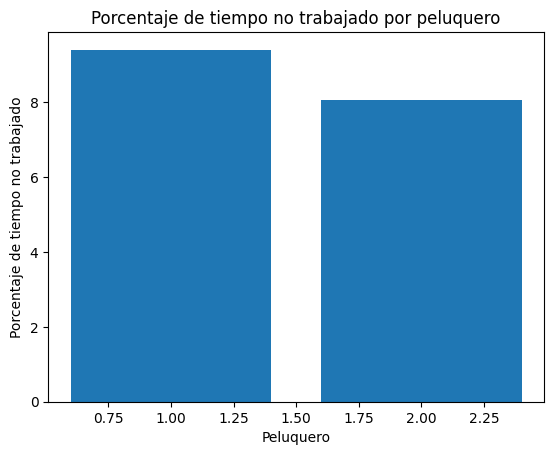

In [ ]:
# Crear una lista con los números de los peluqueros
peluqueros = list(range(1, len(peluqueros_disponibles) + 1))

# Graficar los porcentajes de tiempo no trabajado por peluquero
plt.bar(peluqueros, porcentajes_tiempo_no_trabajado2)
plt.xlabel('Peluquero')
plt.ylabel('Porcentaje de tiempo no trabajado')
plt.title('Porcentaje de tiempo no trabajado por peluquero')
plt.show()

# **Comparamos para ver que nos conviene mas contratar 2 o 3 peluqueros**

In [ ]:
print("--------PARA TRES PELUQUEROS---------")
for i, tiempo in enumerate(tiempo_no_trabajado_peluqueros3):
    peluquero = i + 1
    porcentajes_tiempo_no_trabajado = (tiempo * 100) / 300
    print(f"Tiempo no trabajado del Peluquero {peluquero}: {tiempo:.2f} minutos ({porcentajes_tiempo_no_trabajado:.2f}%)")
    porcentajes_tiempo_no_trabajado3.append(porcentajes_tiempo_no_trabajado)
print(f"\nPromedio de tiempo en fila: {promedio_fila3:.2f}")
print(f"Promedio de tiempo en el sistema: {promedio_sistema3:.2f}")
print("-------PARA DOS PELUQUEROS--------")
for i, tiempo in enumerate(tiempo_no_trabajado_peluqueros2):
    peluquero = i + 1
    porcentajes_tiempo_no_trabajado = (tiempo * 100) / 300
    print(f"Tiempo no trabajado del Peluquero {peluquero}: {tiempo:.2f} minutos ({porcentajes_tiempo_no_trabajado:.2f}%)")
    porcentajes_tiempo_no_trabajado2.append(porcentajes_tiempo_no_trabajado)
print(f"\nPromedio de tiempo en fila: {promedio_fila:.2f}")
print(f"Promedio de tiempo en el sistema: {promedio_sistema:.2f}")

--------PARA TRES PELUQUEROS---------
Tiempo no trabajado del Peluquero 1: 77.57 minutos (25.86%)
Tiempo no trabajado del Peluquero 2: 99.39 minutos (33.13%)
Tiempo no trabajado del Peluquero 3: 131.69 minutos (43.90%)

Promedio de tiempo en fila: 2.76
Promedio de tiempo en el sistema: 25.86
-------PARA DOS PELUQUEROS--------
Tiempo no trabajado del Peluquero 1: 28.19 minutos (9.40%)
Tiempo no trabajado del Peluquero 2: 24.14 minutos (8.05%)

Promedio de tiempo en fila: 19.62
Promedio de tiempo en el sistema: 41.79
